In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_fpath = "../data/IPM_assessment.csv"
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_colwidth", 500)
df = pd.read_csv(data_fpath)
df.head()

,unit_id,doc_ground_truth_value,doc_overall-truthfulness_value,doc_confidence_value,doc_correctness_value,doc_neutrality_value,doc_comprehensibility_value,doc_precision_value,doc_completeness_value,doc_speaker's-trustworthiness_value,doc_informativeness_value,doc_time_elapsed,doc_accesses,doc_assessment_quality
0,unit_1,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,175.61,1.0,2
1,unit_1,2.0,2.0,0.0,2.0,-1.0,2.0,2.0,2.0,2.0,2.0,88.39,1.0,2
2,unit_1,1.0,2.0,0.0,0.0,-1.0,2.0,2.0,-1.0,0.0,1.0,84.60,1.0,1
3,unit_1,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,53.41,1.0,0
4,unit_1,2.0,0.0,-1.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,361.84,1.0,0


In [68]:
df.describe()

,doc_ground_truth_value,doc_overall-truthfulness_value,doc_confidence_value,doc_correctness_value,doc_neutrality_value,doc_comprehensibility_value,doc_precision_value,doc_completeness_value,doc_speaker's-trustworthiness_value,doc_informativeness_value,doc_time_elapsed,doc_accesses,doc_assessment_quality
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2198.000000,2200.000000,2200.000000
mean,0.387273,0.385000,0.044091,0.328182,0.149091,0.811364,0.489545,0.253636,0.352273,0.387273,111.261292,1.035455,1.138182
std,1.207082,1.302201,1.347479,1.259264,1.276844,1.115991,1.222005,1.258797,1.194955,1.207082,104.897821,0.226922,0.908750
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,17.590000,1.000000,0.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,49.355000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,81.835000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,135.362500,1.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1388.600000,3.000000,2.000000


<AxesSubplot:>

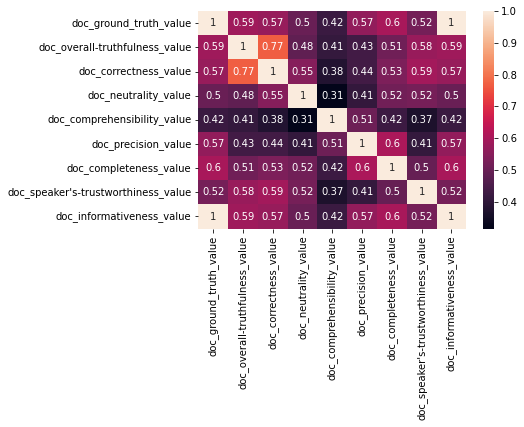

In [69]:
df_relevant = df[[
    "doc_ground_truth_value", 
    "doc_overall-truthfulness_value", 
    "doc_correctness_value", 
    "doc_neutrality_value", 
    "doc_comprehensibility_value", 
    "doc_precision_value", 
    "doc_completeness_value", 
    "doc_speaker's-trustworthiness_value", 
    "doc_informativeness_value", 
]]

sns.heatmap(df_relevant.corr(), annot=True)

<AxesSubplot:xlabel='doc_informativeness_value', ylabel='doc_ground_truth_value'>

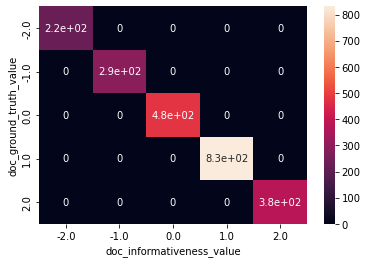

In [71]:
sns.heatmap(pd.crosstab(
    df["doc_ground_truth_value"], df["doc_informativeness_value"]
    ), annot=True)

<AxesSubplot:xlabel='doc_correctness_value', ylabel='doc_overall-truthfulness_value'>

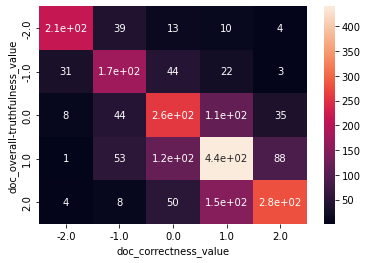

In [72]:
sns.heatmap(pd.crosstab(
    df["doc_overall-truthfulness_value"], df["doc_correctness_value"]
    ), annot=True)

In [73]:
# low correlation between worker's confidence and the assessment quality
df[["doc_confidence_value", "doc_assessment_quality"]].corr()

,doc_confidence_value,doc_assessment_quality
doc_confidence_value,1.000000,0.092322
doc_assessment_quality,0.092322,1.000000


<AxesSubplot:xlabel='doc_assessment_quality', ylabel='Percent'>

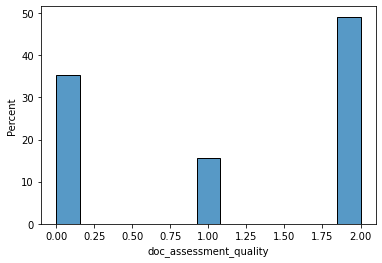

In [75]:
sns.histplot(data=df, x="doc_assessment_quality", stat="percent")

In [92]:
# exact match
exact_match = df.loc[df["doc_ground_truth_value"] == df["doc_overall-truthfulness_value"]]
print(df.shape, exact_match.shape)

worker_quality = exact_match.groupby("unit_id").size().reset_index(name="counts").sort_values(by="counts", ascending=False)
worker_quality.to_csv("../data/IPM_worker_quality.csv", index=False)
worker_quality.describe()

(2200, 14) (1081, 14)


,counts
count,200.000000
mean,5.405000
std,2.455836
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,11.000000
